In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats

%matplotlib inline

#한글 폰트(맑은 고딕) 적용  : 윈도우, 구글 콜랩
matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')

## 카이제곱검정

In [2]:
df = pd.read_csv("data/카이제곱.csv",engine ="python")
df.head(3)

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,2,2,1,1,1,25
2,14,14,3,2,3,8


In [3]:
from scipy.stats import chi2_contingency

chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi2 test")
print('chi2:{0:0.3f}'.format(chi))
print('p - value :{0:0.3f}'.format(pval))
print('degree of freedom:{}'.format(dof))
print('expected value :\n{}'.format(expected.round(1)))

chi2 test
chi2:95.759
p - value :0.000
degree of freedom:30
expected value :
[[10.2  8.4  5.4  3.9  2.  10. ]
 [ 8.2  6.7  4.3  3.2  1.6  8. ]
 [11.2  9.3  5.9  4.3  2.2 11. ]
 [ 7.2  5.9  3.8  2.8  1.4  7. ]
 [ 6.1  5.1  3.2  2.4  1.2  6. ]
 [ 8.2  6.7  4.3  3.2  1.6  8. ]
 [ 5.9  4.8  3.1  2.3  1.1  5.8]]


귀무가설 : 각 제품에 대해 이미지 차이가 없다.  
대립가설 : 각 제품에 대해 이미지 차이가 있다.   

※ 결론 : p값이 0에 가까우므로 귀무가설을 기각한다.  
=>유의수준 5%에서 각 제품에 대해 이미지 차이가 있다.  

## ONE WAY ANOVA

In [8]:
import statsmodels.formula.api as smf

import statsmodels.api as am

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
df = pd.read_csv("data/ANOVA.csv",engine ="python")
df.head(3)

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a


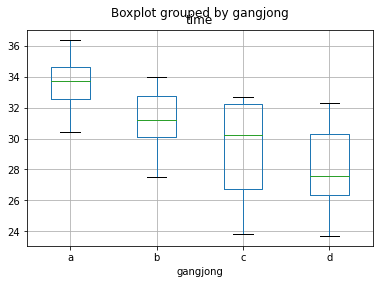

In [9]:
df.boxplot('time', by = "gangjong")

In [10]:
formula = 'time ~ C(gangjong)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


귀무가설 : 강종별 2차정련 시간에 차이가 없다.  
대립가설 : 강종별 2차정련 시간에 차이가 있다.

※결론 : 유의수준 5%에서 p값이 0.019이므로 강종별 2차정련 시간에 차이가 있다고 할 수 있다. 

## 상관분석

In [11]:
df = pd.read_csv("data/correlation.csv",engine ="python")
df.head(3)

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122


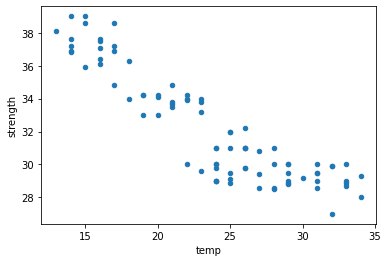

In [12]:
#온도와 강도의 관계를 알아봄 
df.plot.scatter(x="temp", y ="strength")

=> 강한 음의 상관관계

In [13]:
#상관분석실행
corr , pval = stats.pearsonr(df["temp"],df["strength"]) 

print("Correlation Analysis")
print('corr :{0:0.3f}'.format(corr))
print('p-value :{0:0.3f}'.format(pval))

Correlation Analysis
corr :-0.899
p-value :0.000


# 단순선형회귀1

In [14]:
df = pd.read_csv("data/correlation.csv",engine ="python")
df.head(3)

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122


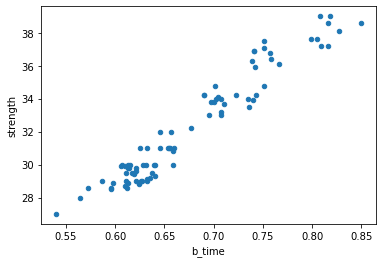

In [15]:
df.plot.scatter(x="b_time", y ="strength")

In [16]:
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

formula ="strength ~ b_time"
model = smf.ols(formula, data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.60e-51
Time:                        16:48:21   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

※ 결론 : 회귀식은  strength = 2.1034 + 44.5520 * baking time 이며,  
설명력은 R - squared = 93.3% 이다. 

# 단순선형회귀2

In [17]:
df = pd.read_csv("data/correlation.csv",engine ="python")
df.head(3)

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122


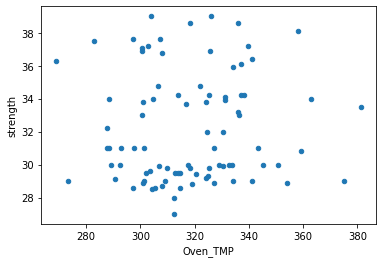

In [20]:
df.plot.scatter(x="Oven_TMP", y ="strength")

In [21]:
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

formula ="strength ~ Oven_TMP"
model = smf.ols(formula, data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.737
Time:                        18:39:31   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0

※ 결론 : 회귀식은  strength = 30.4190 + 0.0056 * Oven_TMP 이며,  
설명력은 R - squared = 0.1% 이다. 